In [1]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Importing the dataset
data=pd.read_csv("World_Happiness_Report.csv")

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


These are the top 5 countries with highest happiness Score

In [4]:
# Look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(158, 12)

In [5]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
# Let's calculate the number of null values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in the dataset

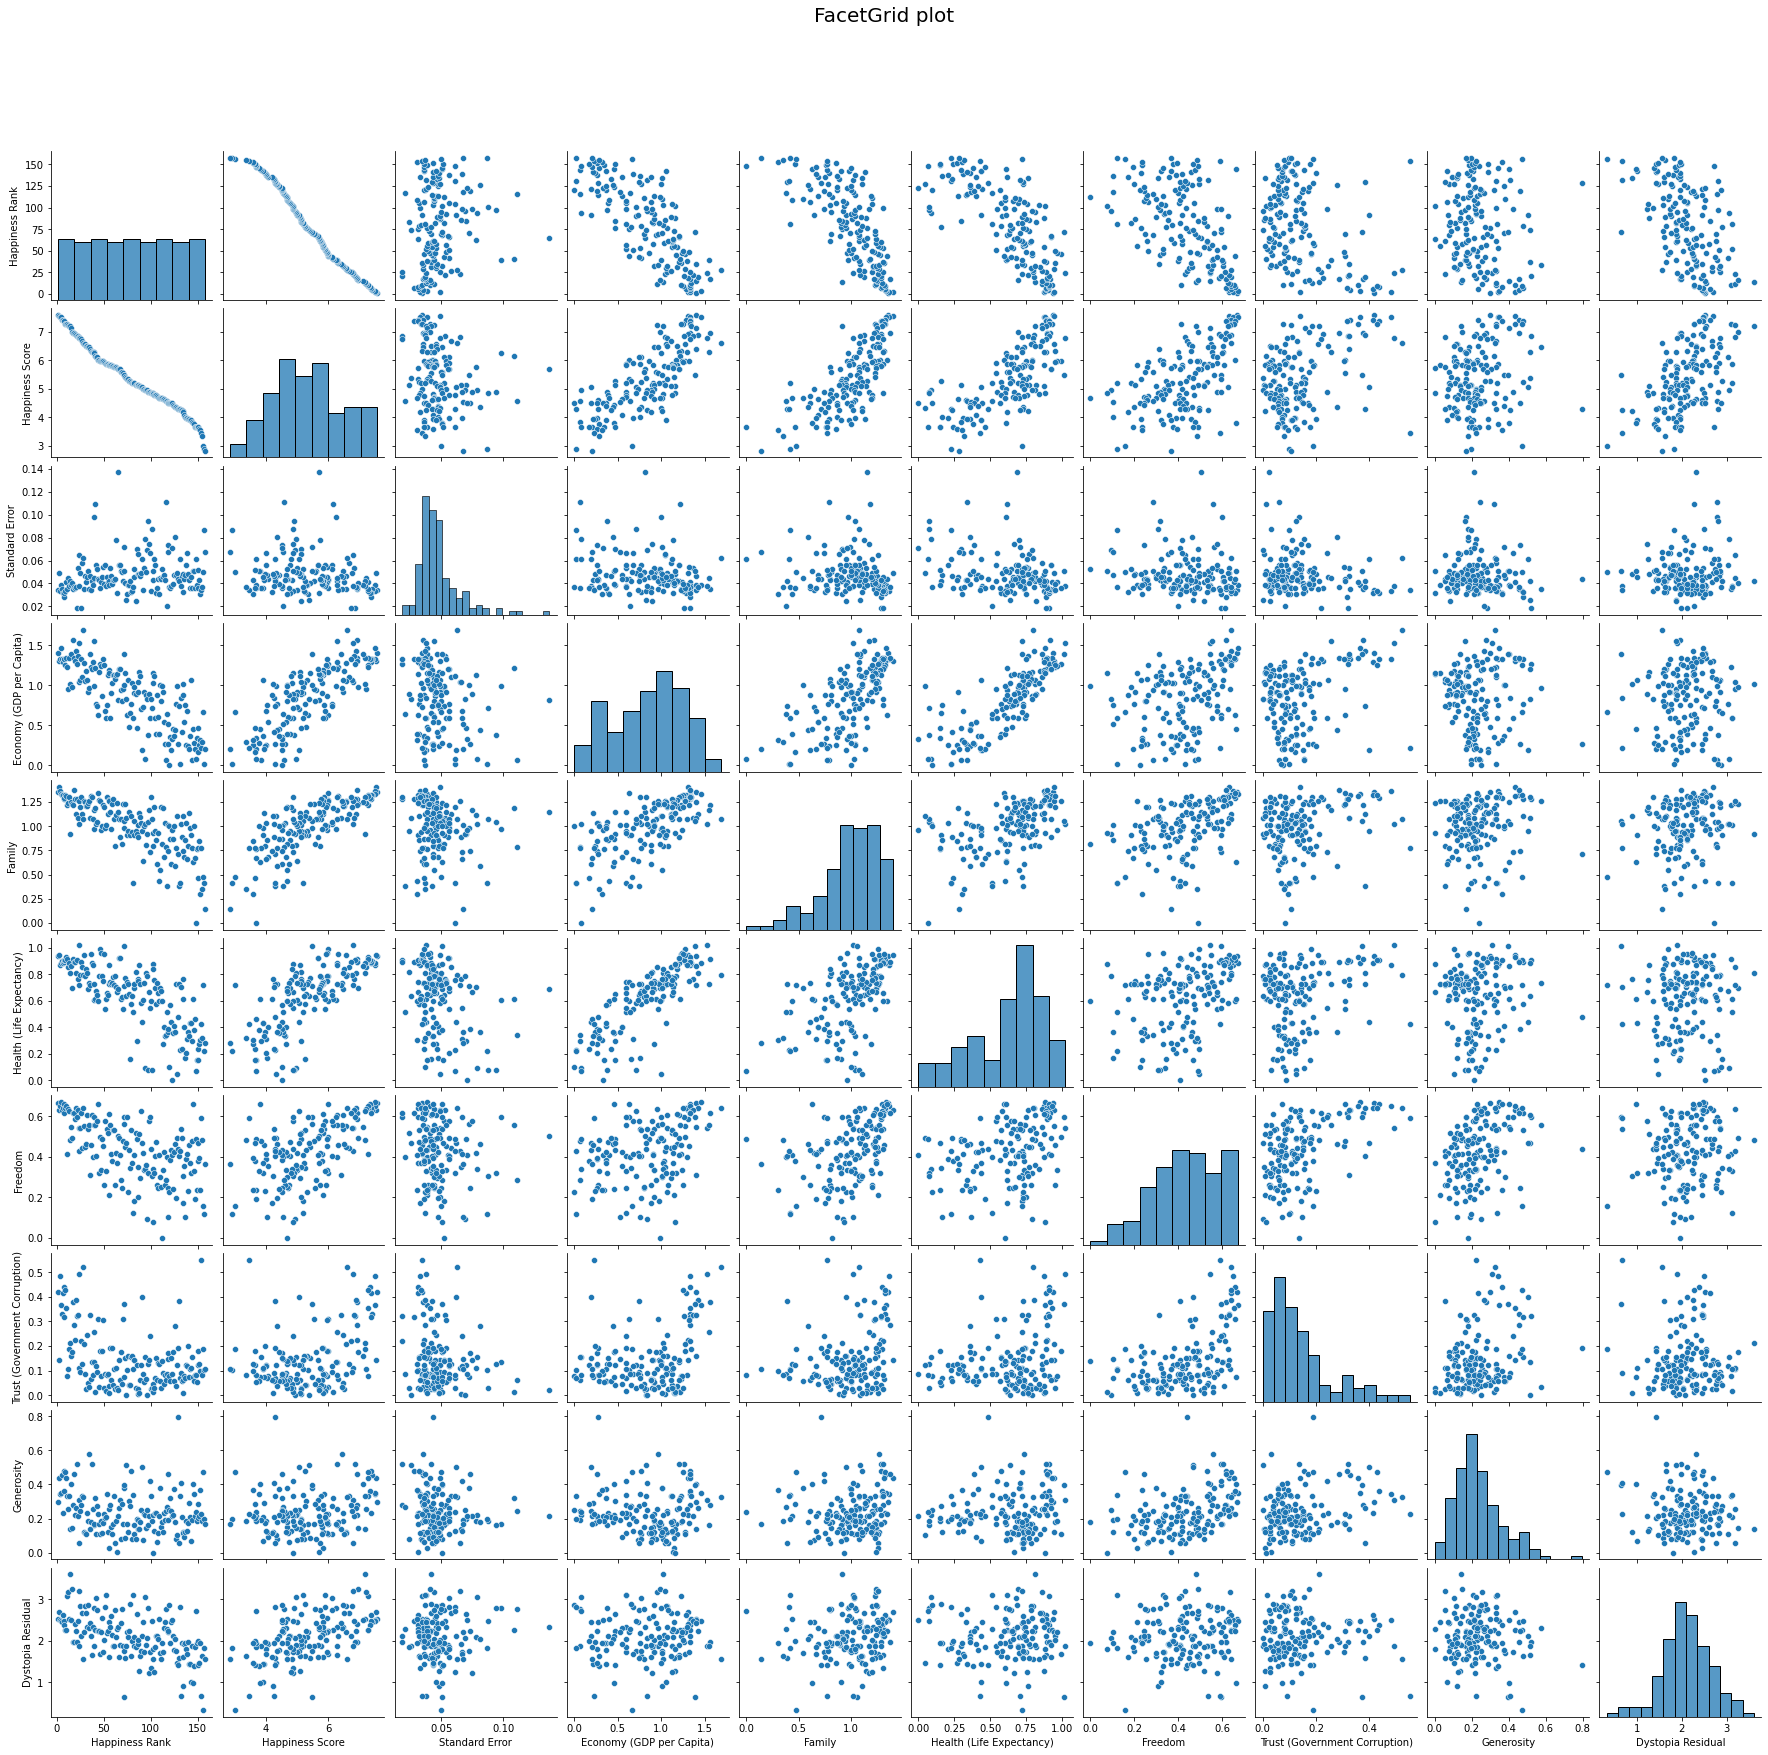

In [7]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

In [8]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.000000,0.780966
Economy (GDP per Capita),0.780966,1.000000


This shows that Economy and Happiness score are highly correlated

Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

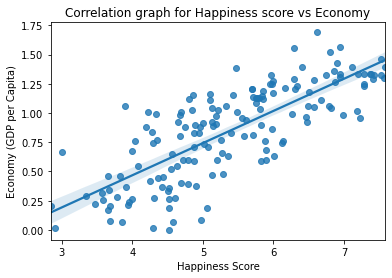

In [9]:
sns.regplot(data = econ_corr, x = 'Happiness Score', y = 'Economy (GDP per Capita)').set_title("Correlation graph for Happiness score vs Economy")

In [10]:
#family
fam_happiness = ['Happiness Score','Family']

fam_corr = data[fam_happiness]

fam_corr.corr()

,Happiness Score,Family
Happiness Score,1.000000,0.740605
Family,0.740605,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Family')

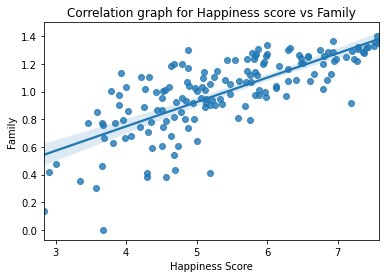

In [11]:
#family plot
sns.regplot(data = fam_corr, x = 'Happiness Score', y = 'Family').set_title("Correlation graph for Happiness score vs Family")

This implies that family and happiness score is also highly correlated

In [12]:
#Health
health_happiness = ['Health (Life Expectancy)','Happiness Score']

health_corr = data[health_happiness]

health_corr.corr()

,Health (Life Expectancy),Happiness Score
Health (Life Expectancy),1.0000,0.7242
Happiness Score,0.7242,1.0000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Health')

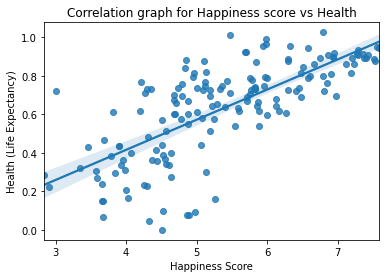

In [13]:
#health plot
sns.regplot(data = health_corr, x = 'Happiness Score', y = 'Health (Life Expectancy)').set_title("Correlation graph for Happiness score vs Health")

Correlation is high between Health and Happiness score

In [14]:
#Freedom
freedom_happiness = ['Freedom', 'Happiness Score']

freedom_corr = data[freedom_happiness]

freedom_corr.corr()

,Freedom,Happiness Score
Freedom,1.000000,0.568211
Happiness Score,0.568211,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Freedom')

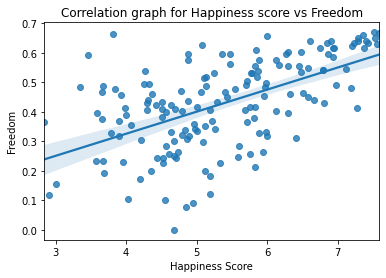

In [15]:
#Freedom Plot
sns.regplot(data = freedom_corr, x = 'Happiness Score', y = 'Freedom').set_title("Correlation graph for Happiness score vs Freedom")

Correlation is weak here. So, this means that Happiness score does not depends on Freedom

In [16]:
#Trust (Gov. Corruption)
trust_happiness = ['Trust (Government Corruption)','Happiness Score']

trust_corr = data[trust_happiness]

trust_corr.corr()

,Trust (Government Corruption),Happiness Score
Trust (Government Corruption),1.000000,0.395199
Happiness Score,0.395199,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Gov. Corruption')

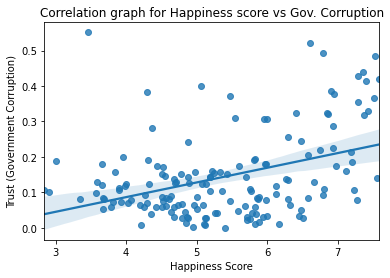

In [17]:
#Trust Plot
sns.regplot(data = trust_corr, x = 'Happiness Score', y = 'Trust (Government Corruption)').set_title("Correlation graph for Happiness score vs Gov. Corruption")


Very weak correlation. This is true as corruption in Government does not make people happy

In [18]:
#Generosity
gen_happiness = ['Generosity','Happiness Score']

gen_corr = data[gen_happiness]

gen_corr.corr()

,Generosity,Happiness Score
Generosity,1.000000,0.180319
Happiness Score,0.180319,1.000000


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Generosity')

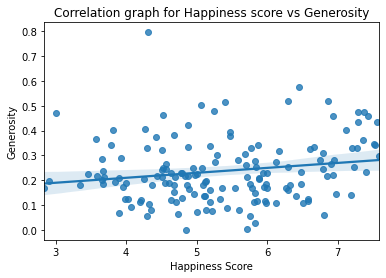

In [19]:
#Geneoristy Plot
sns.regplot(data = gen_corr, x = 'Happiness Score', y = 'Generosity').set_title("Correlation graph for Happiness score vs Generosity")

This also shows very weak correlation. 

<AxesSubplot:>

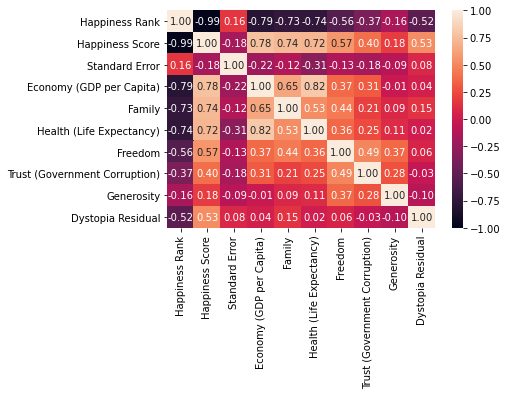

In [20]:
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [21]:
# Calculate the complete correlation matrix
data.corr().round(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.00,-0.99,0.16,-0.79,-0.73,-0.74,-0.56,-0.37,-0.16,-0.52
Happiness Score,-0.99,1.00,-0.18,0.78,0.74,0.72,0.57,0.40,0.18,0.53
Standard Error,0.16,-0.18,1.00,-0.22,-0.12,-0.31,-0.13,-0.18,-0.09,0.08
Economy (GDP per Capita),-0.79,0.78,-0.22,1.00,0.65,0.82,0.37,0.31,-0.01,0.04
Family,-0.73,0.74,-0.12,0.65,1.00,0.53,0.44,0.21,0.09,0.15
Health (Life Expectancy),-0.74,0.72,-0.31,0.82,0.53,1.00,0.36,0.25,0.11,0.02
Freedom,-0.56,0.57,-0.13,0.37,0.44,0.36,1.00,0.49,0.37,0.06
Trust (Government Corruption),-0.37,0.40,-0.18,0.31,0.21,0.25,0.49,1.00,0.28,-0.03
Generosity,-0.16,0.18,-0.09,-0.01,0.09,0.11,0.37,0.28,1.00,-0.10
Dystopia Residual,-0.52,0.53,0.08,0.04,0.15,0.02,0.06,-0.03,-0.10,1.00


This clearly shows that there is high correlation between happiness score and (Economy,Family,Health) whereas weak correlation between happiness score and (Freedom,Trust,Generosity)

In [22]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [28]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

As range for skewness is +0.5/-0.5, following are the columns which are skewed:
    Standard Error
    Family
    Heath
    Trust
    Generosity

<AxesSubplot:>

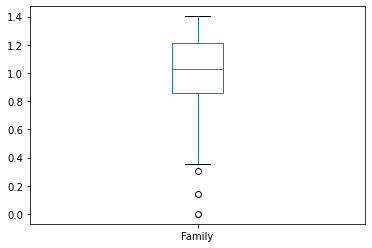

In [29]:
data['Family'].plot.box()

<AxesSubplot:>

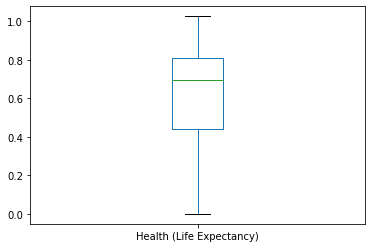

In [30]:
data['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

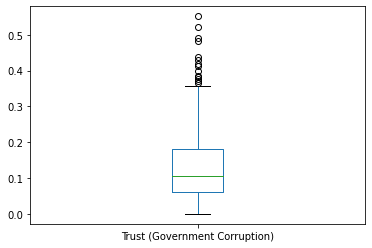

In [31]:
data['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

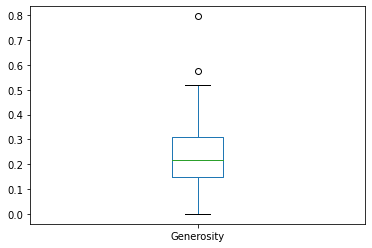

In [32]:
data['Generosity'].plot.box()

<AxesSubplot:>

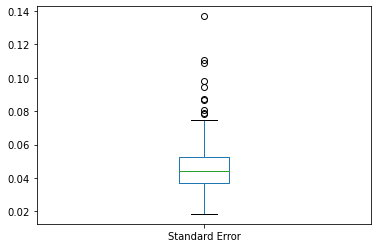

In [33]:
data['Standard Error'].plot.box()

In [34]:
df=data[['Family','Standard Error','Health (Life Expectancy)','Generosity','Trust (Government Corruption)','Economy (GDP per Capita)','Happiness Score']]


In [35]:
df

,Family,Standard Error,Health (Life Expectancy),Generosity,Trust (Government Corruption),Economy (GDP per Capita),Happiness Score
0,1.34951,0.03411,0.94143,0.29678,0.41978,1.39651,7.587
1,1.40223,0.04884,0.94784,0.43630,0.14145,1.30232,7.561
2,1.36058,0.03328,0.87464,0.34139,0.48357,1.32548,7.527
3,1.33095,0.03880,0.88521,0.34699,0.36503,1.45900,7.522
4,1.32261,0.03553,0.90563,0.45811,0.32957,1.32629,7.427
...,...,...,...,...,...,...,...
153,0.77370,0.03464,0.42864,0.22628,0.55191,0.22208,3.465
154,0.35386,0.03656,0.31910,0.18260,0.08010,0.28665,3.340
155,0.47489,0.05015,0.72193,0.47179,0.18906,0.66320,3.006
156,0.41587,0.08658,0.22396,0.19727,0.10062,0.01530,2.905


In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64),
 array([4, 1, 1, 1, 3, 0, 4, 0], dtype=int64))

In [37]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Family,Standard Error,Health (Life Expectancy),Generosity,Trust (Government Corruption),Economy (GDP per Capita),Happiness Score
0,1.34951,0.03411,0.94143,0.29678,0.41978,1.39651,7.587
1,1.40223,0.04884,0.94784,0.43630,0.14145,1.30232,7.561
2,1.36058,0.03328,0.87464,0.34139,0.48357,1.32548,7.527
3,1.33095,0.03880,0.88521,0.34699,0.36503,1.45900,7.522
4,1.32261,0.03553,0.90563,0.45811,0.32957,1.32629,7.427
...,...,...,...,...,...,...,...
151,0.85188,0.04324,0.27125,0.21747,0.12832,0.25812,3.587
152,0.30285,0.03084,0.30335,0.36510,0.09719,0.31982,3.575
154,0.35386,0.03656,0.31910,0.18260,0.08010,0.28665,3.340
155,0.47489,0.05015,0.72193,0.47179,0.18906,0.66320,3.006


In [38]:
df.shape

(158, 7)

In [39]:
df_new_z.shape

(150, 7)

In [40]:
Data_loss=((158-150)/158)*100
Data_loss

5.063291139240507

As data loss is just 5%, we can continue with this

In [41]:
df_new_z.skew()

Family                          -0.798605
Standard Error                   1.240644
Health (Life Expectancy)        -0.755919
Generosity                       0.644088
Trust (Government Corruption)    1.266162
Economy (GDP per Capita)        -0.381407
Happiness Score                  0.138125
dtype: float64

In [42]:
from scipy import stats

In [43]:
family_boxcox=stats.boxcox(df_new_z['Family'])[0]
pd.Series(family_boxcox).skew()

-0.22068701464452783

In [44]:
Stand_Err_boxcox=stats.boxcox(df_new_z['Standard Error'])[0]
pd.Series(Stand_Err_boxcox).skew()

-0.009579029661159135

In [45]:
Generosity_sqrt=np.sqrt(df_new_z['Generosity'])
Generosity_sqrt.skew()

-0.27977698167323123

In [46]:
Trust_sqrt=np.sqrt(df_new_z['Trust (Government Corruption)'])
Trust_sqrt.skew()

0.4261609784079887

In [47]:
Health_sqrt=np.sqrt(df_new_z['Health (Life Expectancy)'])
Health_sqrt.skew()

-1.4432503936023138

In [48]:
df1=pd.DataFrame({})

In [49]:
df1['Family']=family_boxcox
df1['Economy']=df_new_z['Economy (GDP per Capita)']
df1['Trust']=Trust_sqrt
df1['Health']=df_new_z['Health (Life Expectancy)']

In [50]:
df1.isnull().sum()

Family     0
Economy    6
Trust      6
Health     6
dtype: int64

In [51]:
df2=df1.fillna(df1.mean())

In [52]:
df2.isnull().sum()

Family     0
Economy    0
Trust      0
Health     0
dtype: int64

In [53]:
x=df2
y=df_new_z['Happiness Score']

In [54]:
# Prepare x_train, x_test, y_train, y_test
scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)

In [61]:
from sklearn.metrics import r2_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(x_train, y_train)
pred_linreg=linreg.predict(x_test)
linregs=r2_score(y_test,pred_linreg)
linregs
print("Training set R^2:", linreg.score(x_train, y_train))
print("Test set R^2:", linreg.score(x_test, y_test))


Training set R^2: 0.7790813629591112
Test set R^2: 0.7294098497220852


In [63]:
from sklearn.linear_model import Lasso

In [64]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [59]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.7291992941386605

Linear Regression has better accuracy

In [65]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score :',rfs*100)

r2 score : 65.8188218585253


Best model is Linear Regression

In [70]:
#saving the best model
import joblib
#save the model as pickle in file
joblib.dump(linreg,'Happiness_Score.obj')

['Happiness_Score.obj']